# Proyek Analisis Data: [E-Commerce Public]
- **Nama:** [Lukas Krisna Prastiyan]
- **Email:** [lukaskrisnaaa@gmail.com]
- **ID Dicoding:** [lukas420]

## Menentukan Pertanyaan Bisnis

- Produk mana yang paling banyak dan paling sedikit terjual di E-commerce?
- Bagaimana tren performa penjualan E-commerce dari waktu ke waktu?
- Berapa total pendapatan yang diperoleh E-commerce dalam beberapa bulan terakhir?
- Bagaimana distribusi pelanggan dan apakah ada perbedaan preferensi pembelian di antara mereka?

## Import Semua Packages/Library yang Digunakan

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import textwrap

## Data Wrangling

### Gathering Data

**customers_dataset**

In [83]:
customers_df = pd.read_csv('ecommerce/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**geolocation_dataset**

In [84]:
geolocation_df = pd.read_csv('ecommerce/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**order_items_dataset**

In [85]:
order_items_df = pd.read_csv('ecommerce/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**order_payments_dataset**

In [86]:
order_payments_df = pd.read_csv('ecommerce/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**order_reviews_dataset**

In [87]:
order_reviews_df = pd.read_csv('ecommerce/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**orders_dataset**

In [88]:
orders_df = pd.read_csv('ecommerce/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**product_category_name_translation**

In [89]:
product_category_df = pd.read_csv('ecommerce/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**products_dataset**

In [90]:
products_df = pd.read_csv('ecommerce/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**sellers_dataset**

In [91]:
sellers_df = pd.read_csv('ecommerce/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

melihat type data dan jumlah data menggunakan info()

In [92]:
print('\n', customers_df.info())
print('\n', geolocation_df.info())
print('\n', order_items_df.info())
print('\n', order_payments_df.info())
print('\n', order_reviews_df.info())
print('\n', orders_df.info())
print('\n', product_category_df.info())
print('\n', products_df.info())
print('\n', sellers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

**Insight:**
- Dari hasil info(), terlihat bahwa kolom 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date', dan 'order_estimated_delivery_date' seharusnya menggunakan tipe data **datetime**, tetapi saat ini menggunakan tipe data **object**.

cek missing value pada tiap data

In [93]:
print('\n customers missing value:\n', customers_df.isna().sum())
print('\n geolocation missing value:\n', geolocation_df.isna().sum())
print('\n order items missing value:\n', order_items_df.isna().sum())
print('\n order payments missing value:\n', order_payments_df.isna().sum())
print('\n order reviews missing value:\n', order_reviews_df.isna().sum())
print('\n orders missing value:\n', orders_df.isna().sum())
print('\n product category missing value:\n', product_category_df.isna().sum())
print('\n products missing value:\n', products_df.isna().sum())
print('\n sellers missing value:\n', sellers_df.isna().sum())


 customers missing value:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 geolocation missing value:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

 order items missing value:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

 order payments missing value:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

 order reviews missing value:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_cre

**Insight:**
-
Dari hasil pengecekan, terlihat bahwa kolom 'review_comment_title' dan 'review_comment_message' memiliki nilai yang hilang sebanyak 87.656 dan 58.247 berturut-turut. Sementara itu, kolom 'order_approved_at', 'order_delivered_carrier_date', dan 'order_delivered_customer_date' memiliki nilai yang hilang sejumlah 160, 1.783, dan 2.965. Selanjutnya, kolom 'product_category_name', 'product_name_length', 'product_description_length', dan 'product_photos_qty' juga mengalami kehilangan data dengan jumlah yang sama, yaitu 610.

cek duplikasi pada tiap data

In [94]:
print('Jumlah duplikasi data customers:', customers_df.duplicated().sum())
print('Jumlah duplikasi data geolocation:', geolocation_df.duplicated().sum())
print('Jumlah duplikasi data order items:', order_items_df.duplicated().sum())
print('Jumlah duplikasi data order payments:', order_payments_df.duplicated().sum())
print('Jumlah duplikasi data order reviews:', order_reviews_df.duplicated().sum())
print('Jumlah duplikasi data orders:', orders_df.duplicated().sum())
print('Jumlah duplikasi data product category:', product_category_df.duplicated().sum())
print('Jumlah duplikasi data products:', products_df.duplicated().sum())
print('Jumlah duplikasi data sellers:', sellers_df.duplicated().sum())

Jumlah duplikasi data customers: 0
Jumlah duplikasi data geolocation: 261831
Jumlah duplikasi data order items: 0
Jumlah duplikasi data order payments: 0
Jumlah duplikasi data order reviews: 0
Jumlah duplikasi data orders: 0
Jumlah duplikasi data product category: 0
Jumlah duplikasi data products: 0
Jumlah duplikasi data sellers: 0


**Insight:**
- Dari data geolocation terdapat data duplikasi sebanyak 261.831

cek parameter statistik pada tiap data

In [95]:
print('\n\nData statistik customers:\n', customers_df.describe(include='all'))
print('\n\nData statistik geolocation:\n', geolocation_df.describe(include='all'))
print('\n\nData statistik order items:\n', order_items_df.describe(include='all'))
print('\n\nData statistik order payments:\n', order_payments_df.describe(include='all'))
print('\n\nData statistik order reviews:\n', order_reviews_df.describe(include='all'))
print('\n\nData statistik orders:\n', orders_df.describe(include='all'))
print('\n\nData statistik product category:\n', product_category_df.describe(include='all'))
print('\n\nData statistik products:\n', products_df.describe(include='all'))
print('\n\nData statistik sellers:\n', sellers_df.describe(include='all'))



Data statistik customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix c

### Cleaning Data

**1. Tipe Data**

mengubah tipe data kolom 'shipping_limit_date'

In [96]:
datetime_order_items = ["shipping_limit_date"]

for column in datetime_order_items:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


mengubah tipe data kolom 'review_creation_date' dan 'review_answer_timestamp'

In [97]:
datetime_order_reviews = ["review_creation_date","review_answer_timestamp"]

for column in datetime_order_reviews:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


mengubah tipe data kolom 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'

In [98]:
datetime_orders = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_orders:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**2. Missing Value**

memperbaiki missing value 'order_reviews' pada kolom 'review_comment_title' dan 'review_comment_message'

In [99]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [100]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [101]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


In [102]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


mengisi missing value pada kolom 'review_comment_title' dan 'review_comment_message' dengan value "no comment"

In [103]:
order_reviews_df.fillna(value="no comment", inplace=True)

order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


**3. Data Duplikasi**

*Duplikasi data terdeteksi dalam dataset geolocation, tetapi tidak dihapus karena kolom 'geolocation_city' dan 'geolocation_state' menunjukkan bahwa nilai tertinggi adalah Sao Paulo (SP)*

## Exploratory Data Analysis (EDA)

**1. customers_df**

In [104]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [105]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
78452,9a09e1150a3e2333eb93d3c1612bf15f,9fa090c27af98e6e37f23c0cf4feeb14,28893,rio das ostras,RJ
54209,9ac1fd75f48d0f50af8400cd461495cb,6e766da2653f726764bc9879a3512931,9350,maua,SP
83078,4fb0059557dcb01f28a1551fa175ba92,6b9a8da4e47e76ae7184435be338377d,93900,ivoti,RS
73103,72b368a9206b6e158934fdc1b79f962c,35d68a3cffde6623481e49668e51ae08,92120,canoas,RS
27151,9c703a0e38ff9046314a1bff0c9cdd99,b028293bc341508d395f3bc3b19ca914,11040,santos,SP


In [106]:
customers_df.customer_id.is_unique

True

cek kota dengan customer terbanyak

In [107]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


cek negara bagian dengan customer terbanyak

In [108]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**2. geolocation_df tidak dieksplorasi**

**3. order_payments_df**

In [109]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [110]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19485,f0dd29734578caa3db607e173070e2a9,1,credit_card,3,84.73
16501,c27185a2e9d628b1626fcff8538c876d,1,credit_card,10,281.82
16436,918b23cbb191b942f9b138e7aafb295c,1,boleto,1,53.53
101407,d24be64fd6aadd3a06ae6afcf8785cc2,1,credit_card,2,662.74
97328,f9281da15642bc69f27307e1dc987b30,1,credit_card,1,10.64


cek metode pembayaran yang paling banyak digunakan

In [111]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


**4. orders_df**

In [112]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
79167,ee6a6563831f675482a3a816f1bef6e3,9712f52bb03dbf1e5f778230d13d96cc,delivered,2017-11-11 11:32:53,2017-11-13 17:15:54,2017-11-16 23:24:32,2017-11-22 22:42:07,2017-12-01
44488,2b7e04dafad49a3e4eb2ee14ad07485a,c91bd6612a890b01e5321aff3a336791,delivered,2018-06-09 02:35:31,2018-06-09 03:13:29,2018-06-11 11:49:00,2018-06-14 23:42:17,2018-06-20
93709,b95ee76467f40a43ca737b18839d83d6,9e38a0715d956ca6c48e44feb01e3c00,delivered,2018-04-29 22:59:41,2018-05-01 05:55:03,2018-05-03 13:19:00,2018-05-04 20:28:42,2018-05-17
40545,be7a9c3e520e513bf7de720ea2d85463,87cb1b0051ce302c8d1ec6ceea791786,delivered,2018-04-28 15:53:57,2018-04-28 16:13:24,2018-04-30 12:46:00,2018-05-02 15:26:59,2018-05-11
28794,5c2630d9eb5757718ef5a12b09368935,54099127e93a69b6697c6d12fba8fa2c,delivered,2018-07-12 11:31:04,2018-07-13 02:45:12,2018-07-16 14:29:00,2018-07-26 20:33:10,2018-08-08


In [113]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
13127,6bdee91009b22f7138ff28b4b3650ace,6a2641f4a76f73594fed753d6d74aad0,delivered,2017-09-18 19:12:20,2017-09-19 15:15:21,2017-09-20 17:20:27,2017-09-25 17:58:34,2017-10-10,5.0
60826,79617f3124fcf7a760316d99421bd30f,20c75fffe6b40dbb0972b96951be2c4a,processing,2018-01-11 11:45:10,2018-01-13 04:55:06,NaT,NaT,2018-02-06,NaN
81754,c4dacba4560d22bf516c37d850225b2c,ae248597049fb44138b7cc721eb5bc5f,delivered,2017-12-20 21:44:31,2017-12-20 21:56:28,2017-12-21 16:09:43,2018-01-03 23:29:01,2018-01-15,13.0
78832,597793d262bf35d4ff6b50360f836d82,a8f70597c7c83e71598dfe9af1c791bd,shipped,2017-07-06 12:55:44,2017-07-06 13:10:09,2017-07-07 19:22:14,NaT,2017-08-11,NaN
57689,6bcee650c0948a4d061fbac64d157ba5,5c3bc8bdca2fc8158e9909e146b8f337,delivered,2018-07-26 15:26:12,2018-07-26 15:35:18,2018-07-30 14:01:00,2018-08-03 00:12:10,2018-08-13,3.0


cek jumlah status pelanggan

In [117]:
customers_df["status"] = customers_df["customer_id"].isin(orders_df["customer_id"]).map({True: "Active", False: "Non Active"})

In [118]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,99441


**5. merge customers_df & orders_df**

In [119]:
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [120]:
print('\n', customers_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10))
print('\n', customers_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10))
print('\n', customers_orders_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10))


 customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

 customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

 customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: order_id, dtype: int64


**6. merge order_payments_df & order_reviews_df**

In [121]:
order_payment_reviews_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payment_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39


In [122]:
order_payment_reviews_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [123]:
order_payment_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,no comment,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,no comment,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,no comment,no comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,no comment,2018-08-24,2018-08-25 02:24:54


In [124]:
order_payment_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

**7. merge customers_orders_df & order_payment_reviews_df**

In [125]:
new_customers_df = pd.merge(
    left=customers_orders_df,
    right=order_payment_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
new_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


**8. merge orders_item_df & sellers_df**

In [126]:
order_items_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
order_items_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [127]:
print('\n', order_items_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10))
print('\n', order_items_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10))


 seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

 seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64


**9. merge products_df & product_category_df**

In [128]:
new_product_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
new_product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [129]:
print('\n', new_product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10))
print('\n', new_product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10))


 product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

 product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64


**10. merge new_product_df & order_items_seller_df**

In [130]:
new_sellers_df = pd.merge(
    left=new_product_df,
    right=order_items_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
new_sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [131]:
new_sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [132]:
new_sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

**11. merge all dataset**

In [133]:
all_data = pd.merge(
    left=new_customers_df,
    right=new_sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [134]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   status                         119143 non-null  object        
 6   order_id                       119143 non-null  object        
 7   order_status                   119143 non-null  object        
 8   order_purchase_timestamp       119143 non-null  datetime64[ns]
 9   order_approved_at              118966 non-null  datetime64[ns]
 10  order_delivered_carrier_date   117057 non-null  datetime64[ns]
 11  

In [135]:
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [136]:
all_data.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

In [137]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [138]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

**12. Membuat data csv baru yang telah selesai dieksplorasi**

In [139]:
all_data.to_csv('ecommerce/all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

***Produk mana yang paling banyak dan paling sedikit terjual di E-commerce?***

In [140]:
sum_order_items_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})
sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)
sum_order_items_df = sum_order_items_df.head(10)

sum_order_items_df.head()

,product_category_name_english,products
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


<ipython-input-141-b3af64c6d905>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.head(5), palette=green_palette, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/

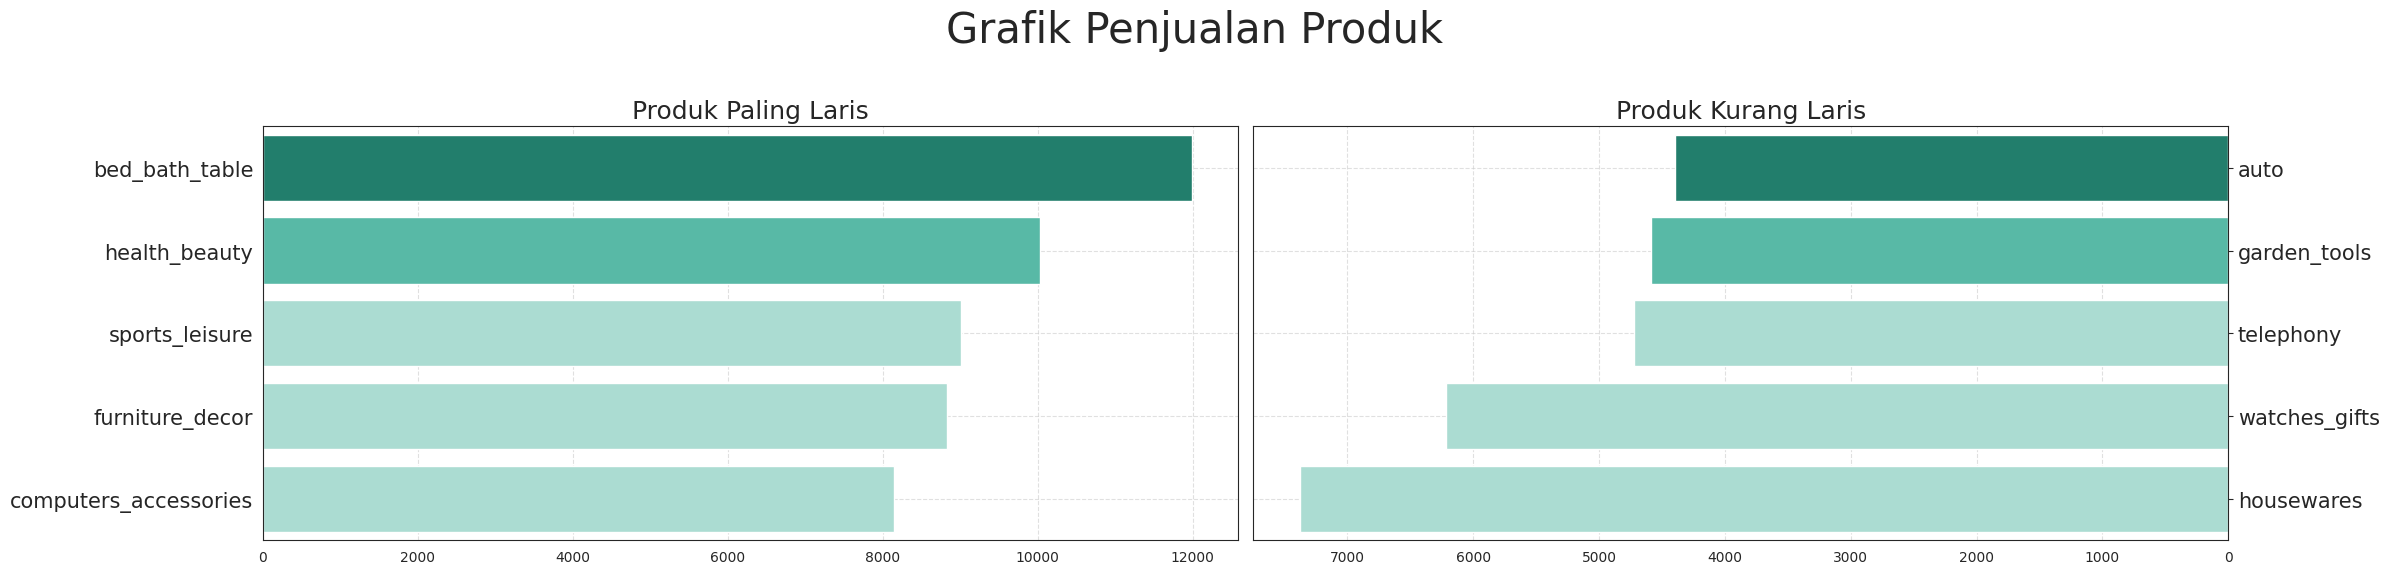

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

green_palette = ["#138D75", "#48C9B0", "#A3E4D7", "#A3E4D7", "#A3E4D7"]

sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.head(5), palette=green_palette, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk Paling Laris", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].grid(True, linestyle='--', alpha=0.6)

sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.sort_values(by="products", ascending=True).head(5), palette=green_palette, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk Kurang Laris", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].grid(True, linestyle='--', alpha=0.6)

plt.suptitle("Grafik Penjualan Produk", fontsize=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Insight:**
- Produk dalam kategori **bed_bath_table** sangat diminati dan bisa menjadi fokus utama untuk peningkatan inventori atau promosi lebih lanjut.
- Kategori seperti **auto** dan **garden_tools** mungkin memerlukan strategi pemasaran yang lebih inovatif atau penyesuaian strategi produk untuk meningkatkan penjualan.

### Pertanyaan 2:

***Bagaimana tren performa penjualan E-commerce dari waktu ke waktu?***

In [142]:
order_count_monthly_df = all_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})
order_count_monthly_df.index = order_count_monthly_df.index.strftime('%B')
order_count_monthly_df = order_count_monthly_df.reset_index()
order_count_monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
order_count_monthly_df.head()

<ipython-input-142-162ff9569609>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  order_count_monthly_df = all_data.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,order_count
0,September,1
1,October,320
2,November,0
3,December,1
4,January,760


In [143]:
order_count_monthly_df = order_count_monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')
order_count_monthly_df.head()

,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176


In [144]:
order_count_monthly_df.sort_values(by='order_count', ascending=False)

,order_approved_at,order_count
14,November,7395
18,March,7288
16,January,7187
20,May,7066
19,April,6778
17,February,6706
23,August,6620
22,July,6176
21,June,6164
15,December,5832


In [145]:
month_code = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

order_count_monthly_df["month_numeric"] = order_count_monthly_df["order_approved_at"].map(month_code)
order_count_monthly_df = order_count_monthly_df.sort_values("month_numeric")
order_count_monthly_df = order_count_monthly_df.drop("month_numeric", axis=1)

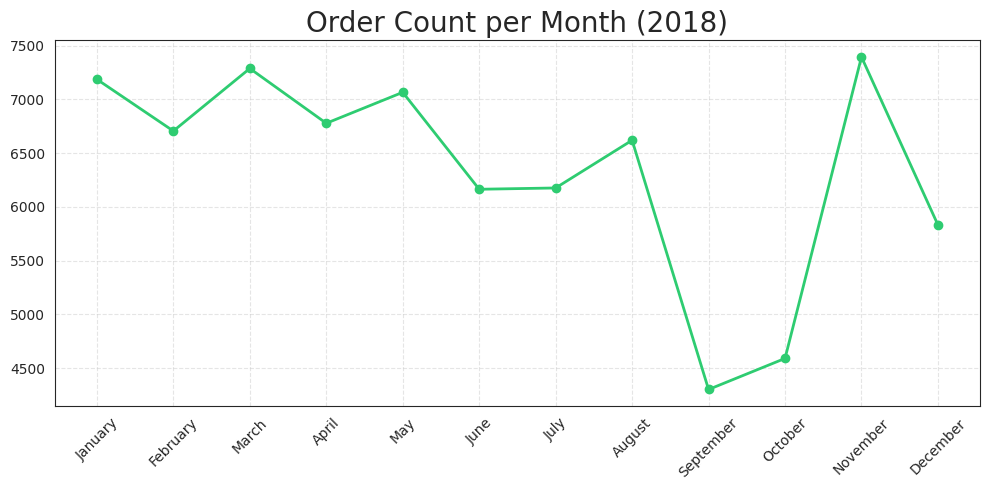

In [146]:
plt.figure(figsize=(10, 5))
plt.plot(
    order_count_monthly_df["order_approved_at"],
    order_count_monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#2ECC71"
)
plt.title("Order Count per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- Grafik menggambarkan adanya perubahan yang jelas dalam penjualan sepanjang tahun, dengan peningkatan penjualan yang terlihat pada awal dan akhir tahun, serta penurunan di pertengahan tahun.

### Pertanyaan 3:

***Berapa total pendapatan yang diperoleh E-commerce dalam beberapa bulan terakhir?***

In [147]:
monthly_income_df = all_data.resample(rule='M', on='order_approved_at').agg({
    "payment_value":"sum"
})
monthly_income_df.index = monthly_income_df.index.strftime('%B')
monthly_income_df = monthly_income_df.reset_index()
monthly_income_df.rename(columns={
    "payment_value":"total_income"
}, inplace=True)
monthly_income_df.head()

<ipython-input-147-63279ec8c8e5>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_income_df = all_data.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,total_income
0,September,0.00
1,October,75985.54
2,November,0.00
3,December,19.62
4,January,182178.36


In [148]:
monthly_income_df = monthly_income_df.sort_values('total_income').drop_duplicates('order_approved_at', keep='last')
monthly_income_df.head()

,order_approved_at,total_income
12,September,927821.13
15,December,1092932.59
13,October,1138730.07
23,August,1268960.54
21,June,1306785.03


In [149]:
monthly_income_df.sort_values(by='total_income', ascending=False)

,order_approved_at,total_income
14,November,1588308.55
20,May,1545868.81
18,March,1500474.01
19,April,1476502.25
16,January,1406557.66
22,July,1334156.42
17,February,1314882.87
21,June,1306785.03
23,August,1268960.54
13,October,1138730.07


In [150]:
monthly_income_df["month_numeric"] = monthly_income_df["order_approved_at"].map(month_code)
monthly_income_df = monthly_income_df.sort_values("month_numeric")
monthly_income_df = monthly_income_df.drop("month_numeric", axis=1)

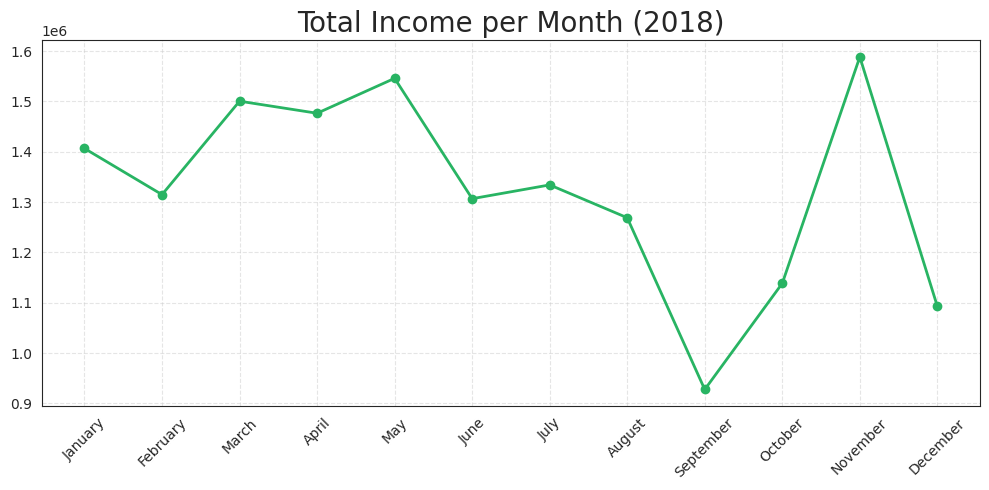

In [151]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_income_df["order_approved_at"],
    monthly_income_df["total_income"],
    marker='o',
    linewidth=2,
    color="#28B463"
)
plt.title("Total Income per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- Bulan **November** dan **Desember** adalah bulan-bulan yang sangat baik menandakan bahwa akhir tahun adalah waktu yang penting bagi E-commerce untuk memaksimalkan promosi dan penjualan agar bisa mendapatkan keuntungan maksimal.

### Pertanyaan 4:

***Bagaimana distribusi pelanggan dan apakah ada perbedaan preferensi pembelian di antara mereka?***

In [152]:
customers_by_state_df = all_data.groupby(by="customer_state").customer_id.nunique().reset_index()
customers_by_state_df.rename(columns={
    "customer_id": "total_customer"
}, inplace=True)
customers_by_state_df.head()

,customer_state,total_customer
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380


<ipython-input-153-90e7d962d2f9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='total_customer',
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will nee

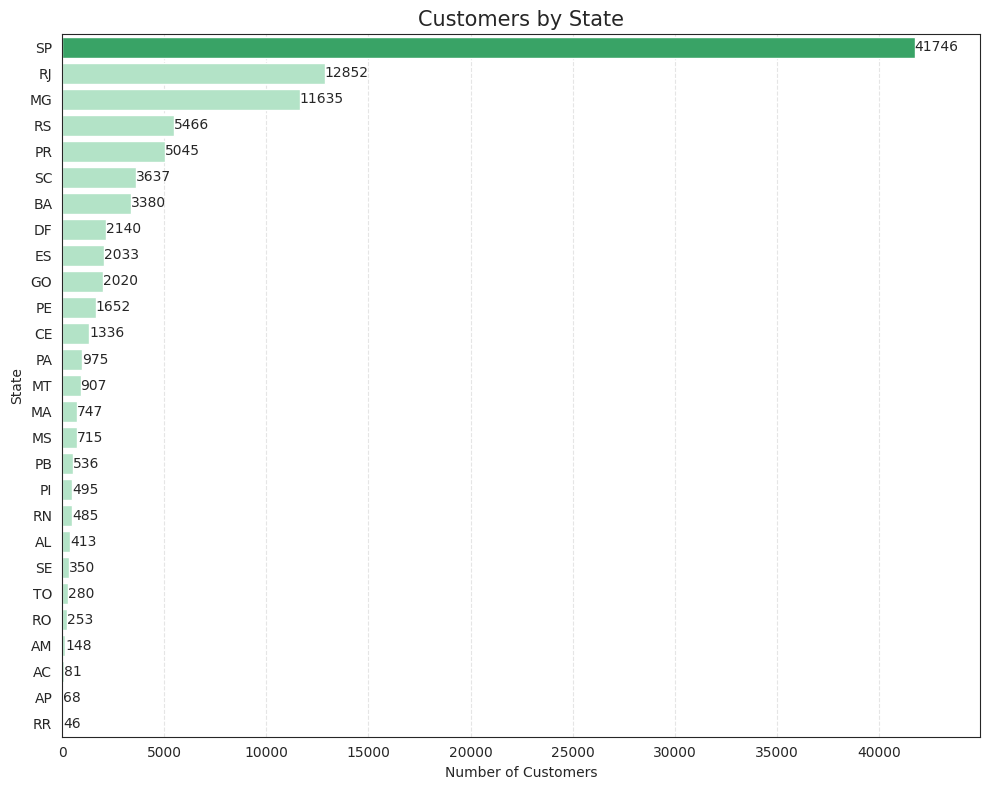

In [153]:
plt.figure(figsize=(10, 8))
sns.set_style("white")

most_common_state = customers_by_state_df.loc[customers_by_state_df['total_customer'].idxmax(), 'customer_state']
customers_by_state_df = customers_by_state_df.sort_values(by='total_customer', ascending=False)

palette = ["#28B463" if state == most_common_state else "#ABEBC6" for state in customers_by_state_df['customer_state']]

ax = sns.barplot(x='total_customer',
                 y='customer_state',
                 data=customers_by_state_df,
                 palette=palette,
                 orient='h'
                )

plt.title("Customers by State", fontsize=15)
plt.xlabel("Number of Customers")
plt.ylabel("State")
plt.xticks(fontsize=10)

x_max = customers_by_state_df['total_customer'].max() + 3200
plt.xlim(0, x_max)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.), va='center', fontsize=10, ha='left')

plt.grid(True, linestyle='--', alpha=0.5, which='both', axis='x')
plt.tight_layout()
plt.show()

<ipython-input-154-d0fffffbaa1f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=customers_by_city_df.values,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

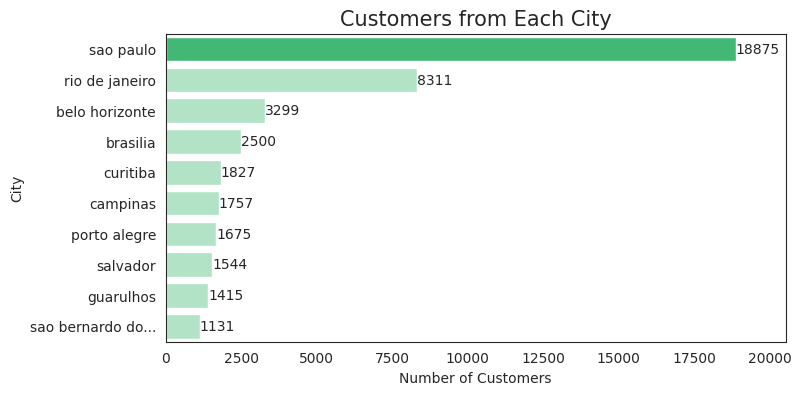

In [154]:
customers_by_city_df = all_data['customer_city'].value_counts().head(10)
customers_by_city_df = customers_by_city_df.sort_values(ascending=False)

top_cities = customers_by_city_df.index
top_cities = [textwrap.shorten(city, width=20, placeholder="...") for city in top_cities]

plt.figure(figsize=(8, 4))

most_common_city = customers_by_city_df.idxmax()

ax = sns.barplot(x=customers_by_city_df.values,
                 y=top_cities,
                 palette=["#2ECC71" if city == most_common_city else "#ABEBC6" for city in top_cities]
                )

plt.xlim(0, customers_by_city_df.max() + 1650)

plt.title("Customers from Each City", fontsize=15)
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.xticks(fontsize=10)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.), va='center', fontsize=10)

plt.show()

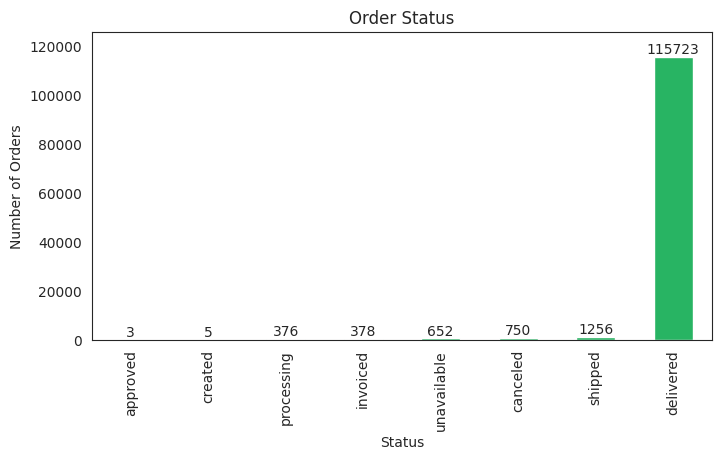

In [155]:
total_order_status_df = all_data['order_status'].value_counts(ascending=True)

plt.figure(figsize=(8, 4))
ax = total_order_status_df.plot(kind='bar', color='#28B463')
plt.title('Order Status')
plt.xlabel('Status')
plt.ylabel('Number of Orders')

plt.ylim(0, total_order_status_df.max() + 10000)

for i, v in enumerate(total_order_status_df):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

**Insight:**
- Pasar E-commerce di Brasil sebagian besar terpusat di negara bagian **Sao Paulo (SP)** dengan jumlah pelanggan terbanyak, mencapai hampir **42000 pada grafik Customers by State** dan **19,000 pada grafik Customers from each city**. Ini menunjukkan bahwa Sao Paulo adalah pusat aktivitas belanja online terbesar di Brasil.
- Pada grafik Order Status, tingginya jumlah pesanan dengan status **delivered** menunjukkan bahwa proses penyelesaian pesanan di E-commerce ini sangat efektif.

## Conclusion

**1. Produk mana yang paling banyak dan paling sedikit terjual di E-commerce?**

Produk kategori bed_bath_table yang sangat laris menunjukkan permintaan tinggi yang berkelanjutan, yang bisa dijadikan peluang untuk meningkatkan inventori dan promosi, sedangkan penjualan rendah pada kategori auto dan garden_tools memerlukan pengembangan strategi pemasaran yang lebih kreatif dan penyesuaian produk untuk meningkatkan penjualan.

**2. Bagaimana tren performa penjualan E-commerce dari waktu ke waktu?**

Penjualan E-commerce cenderung meningkat secara signifikan pada awal dan akhir tahun, terutama selama musim belanja liburan di bulan November dan Desember, sedangkan terjadi penurunan di pertengahan tahun yang mungkin disebabkan oleh faktor musiman atau minimnya hari libur besar.

**3. Berapa total pendapatan yang diperoleh E-commerce dalam beberapa bulan terakhir?**

Peningkatan pendapatan yang signifikan pada bulan November dan Desember menegaskan bahwa periode ini sangat penting bagi E-commerce untuk melaksanakan promosi dan strategi penjualan yang efektif demi memaksimalkan keuntungan.

**4. Bagaimana distribusi pelanggan dan apakah ada perbedaan preferensi pembelian di antara mereka?**

Sao Paulo mendominasi pasar E-commerce di Brasil dengan jumlah pelanggan yang jauh lebih tinggi dibandingkan wilayah lain, menunjukkan tingginya permintaan dan potensi pasar di sana, sementara proses pengiriman dan penyelesaian pesanan yang sangat efisien, ditunjukkan oleh tingginya jumlah pesanan dengan status "delivered", mencerminkan keberhasilan E-commerce dalam memenuhi kebutuhan pelanggan.